In [15]:
# !pip install dython

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dython import nominal

In [17]:
# Cargar los datos del clima
df_clima=pd.read_csv('/content/data/Weather Dataset.csv')
#Muestra las 10 primeras filas del dataset
df_clima.head(10)

<ipython-input-17-523e9a6d4062>:2: DtypeWarning: Columns (7,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clima=pd.read_csv('/content/data/Weather Dataset.csv')


,AirportID,Year,Month,Day,Time,TimeZone,SkyCondition,Visibility,WeatherType,DryBulbFarenheit,...,WindSpeed,WindDirection,ValueForWindCharacter,StationPressure,PressureTendency,PressureChange,SeaLevelPressure,RecordType,HourlyPrecip,Altimeter
0,14843,2013,4,1,56,-4,FEW018 SCT044 BKN070,10.00,-RA,76,...,13,080,,30.06,,,30.06,AA,T,30.07
1,14843,2013,4,1,156,-4,FEW037 SCT070,10.00,,76,...,10,090,,30.05,6,017,30.05,AA,,30.06
2,14843,2013,4,1,256,-4,FEW037 SCT070,10.00,,76,...,9,100,,30.03,,,30.03,AA,,30.04
3,14843,2013,4,1,356,-4,FEW025 SCT070,10.00,,76,...,9,100,,30.02,,,30.03,AA,,30.03
4,14843,2013,4,1,456,-4,FEW025,10.00,,76,...,7,110,,30.03,5,004,30.04,AA,,30.04
5,14843,2013,4,1,556,-4,FEW025 SCT080,10.00,,76,...,7,100,,30.04,,,30.05,AA,,30.05
6,14843,2013,4,1,656,-4,FEW028 BKN080,10.00,,77,...,9,110,,30.07,,,30.07,AA,,30.08
7,14843,2013,4,1,756,-4,FEW028 BKN080,10.00,,79,...,13,100,,30.09,3,020,30.10,AA,,30.10
8,14843,2013,4,1,856,-4,FEW030 BKN080,10.00,,82,...,14,100,21,30.11,,,30.11,AA,,30.12
9,14843,2013,4,1,956,-4,SCT035 BKN090,10.00,,83,...,16,090,23,30.11,,,30.12,AA,,30.12


In [18]:
df_clima.shape


(406516, 26)

In [19]:
columnas = []
conteo_valores_unicos = []
valores_unicos = []
tipo_dato= []
conteo_nulos =[]
# Iterar a través de las columnas del DataFrame
for columna in df_clima.columns:
    valores_unicos_columna = df_clima[columna].unique()

    columnas.append(columna)
    conteo_valores_unicos.append(len(valores_unicos_columna))
    valores_unicos.append(valores_unicos_columna)
    tipo_dato.append(df_clima[columna].dtypes)
    conteo_nulos.append(df_clima[columna].isnull().sum())
informacion_columnas = pd.DataFrame({
    'Campo': columnas,
    'tipo_dato':tipo_dato,
    'Número_Valores_Unicos': conteo_valores_unicos,
    'conteo_nulos':conteo_nulos,
    'Valores_Unicos': valores_unicos
})

informacion_columnas.head(informacion_columnas.shape[0])

,Campo,tipo_dato,Número_Valores_Unicos,conteo_nulos,Valores_Unicos
0,AirportID,int64,66,0,"[14843, 13204, 13303, 15304, 14027, 11697, 146..."
1,Year,int64,1,0,[2013]
2,Month,int64,7,0,"[4, 5, 6, 7, 8, 9, 10]"
3,Day,int64,31,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,Time,int64,1440,0,"[56, 156, 256, 356, 456, 556, 656, 756, 856, 9..."
5,TimeZone,int64,7,0,"[-4, -5, -6, -10, -7, -8, -9]"
6,SkyCondition,object,82826,0,"[FEW018 SCT044 BKN070, FEW037 SCT070, FEW025 S..."
7,Visibility,object,46,0,"[10.00, 8.00, 9.00, 1.00, 2.00, 4.00, 6...."
8,WeatherType,object,169,0,"[-RA, , +RA BR, RA BR, -RA BR, RA, +RA, TSRA,..."
9,DryBulbFarenheit,object,112,0,"[76, 77, 79, 82, 83, 84, 86, 85, 81, 80, 78, 7..."


In [20]:
informacion_columnas['tipo_dato'].value_counts()

object    20
int64      6
Name: tipo_dato, dtype: int64

La base de datos con los registros del clima contiene 406516 registros distribuidos en 26 campos dentro de los que se encuentra el ID de los aeropuertos, año mes día y hora del registro, la zona horaria, las condiciones del cielo de acuerdo con los codigos de clasificación de la fuente, las condiciones de visibilidad, el tipo de clima, temperatura del aire en grados Fahrenheit y Celcius, así mismo la humedad, velocidad y dirección del viento, presurisación entre otros campos.

Debido a que varios de los campos numericos estan como object, se realiza la transformación de los datos:

In [21]:
# Vamos primero a transformar los tipos de datos de las variables del dataset de clima
# Transforma una variable numérica a una categórica (Tipo String)
df_clima['AirportID'] = df_clima['AirportID'].astype(str)

#Transforma el tipo de datos a variables numéricas (enteros y decimales)
df_clima['Visibility'] = pd.to_numeric(df_clima['Visibility'], errors='coerce')
df_clima['DryBulbFarenheit'] = pd.to_numeric(df_clima['DryBulbFarenheit'], errors='coerce')
df_clima['DryBulbCelsius'] = pd.to_numeric(df_clima['DryBulbCelsius'], errors='coerce')
df_clima['WetBulbFarenheit'] = pd.to_numeric(df_clima['WetBulbFarenheit'], errors='coerce')
df_clima['WetBulbCelsius'] = pd.to_numeric(df_clima['WetBulbCelsius'], errors='coerce')
df_clima['DewPointFarenheit'] = pd.to_numeric(df_clima['DewPointFarenheit'], errors='coerce')
df_clima['DewPointCelsius'] = pd.to_numeric(df_clima['DewPointCelsius'], errors='coerce')
df_clima['RelativeHumidity'] = pd.to_numeric(df_clima['RelativeHumidity'], errors='coerce')
df_clima['WindSpeed'] = pd.to_numeric(df_clima['WindSpeed'], errors='coerce')
df_clima['WindDirection'] = pd.to_numeric(df_clima['WindDirection'], errors='coerce')
df_clima['ValueForWindCharacter'] = pd.to_numeric(df_clima['ValueForWindCharacter'], errors='coerce')
df_clima['StationPressure'] = pd.to_numeric(df_clima['StationPressure'], errors='coerce')
df_clima['PressureTendency'] = pd.to_numeric(df_clima['PressureTendency'], errors='coerce')
df_clima['PressureChange'] = pd.to_numeric(df_clima['PressureChange'], errors='coerce')
df_clima['SeaLevelPressure'] = pd.to_numeric(df_clima['SeaLevelPressure'], errors='coerce')
df_clima['Altimeter'] = pd.to_numeric(df_clima['Altimeter'], errors='coerce')

In [22]:
df_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406516 entries, 0 to 406515
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AirportID              406516 non-null  object 
 1   Year                   406516 non-null  int64  
 2   Month                  406516 non-null  int64  
 3   Day                    406516 non-null  int64  
 4   Time                   406516 non-null  int64  
 5   TimeZone               406516 non-null  int64  
 6   SkyCondition           406516 non-null  object 
 7   Visibility             406408 non-null  float64
 8   WeatherType            406516 non-null  object 
 9   DryBulbFarenheit       406227 non-null  float64
 10  DryBulbCelsius         406227 non-null  float64
 11  WetBulbFarenheit       405019 non-null  float64
 12  WetBulbCelsius         405019 non-null  float64
 13  DewPointFarenheit      406135 non-null  float64
 14  DewPointCelsius        406135 non-nu

In [23]:
# Realice la misma operación para la variable del data frame de clima
df_clima['Time'] = df_clima['Time'].apply(lambda x: x/100)
df_clima['Time'] = df_clima['Time'].round(0)
df_clima['Time']

0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
          ... 
406511    22.0
406512    22.0
406513    23.0
406514    23.0
406515    24.0
Name: Time, Length: 406516, dtype: float64

In [24]:
# Eliminamos las variables que tienen un alto % de faltantes
df_clima =df_clima.drop(['ValueForWindCharacter', 'PressureTendency','PressureChange','SeaLevelPressure'], axis=1)

#Eliminamos las obersvaciones que tienen alguna otro valor faltante dado que es un pequeño %
df_clima = df_clima.dropna(how='any',axis=0)

df_clima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393636 entries, 0 to 406515
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   AirportID          393636 non-null  object 
 1   Year               393636 non-null  int64  
 2   Month              393636 non-null  int64  
 3   Day                393636 non-null  int64  
 4   Time               393636 non-null  float64
 5   TimeZone           393636 non-null  int64  
 6   SkyCondition       393636 non-null  object 
 7   Visibility         393636 non-null  float64
 8   WeatherType        393636 non-null  object 
 9   DryBulbFarenheit   393636 non-null  float64
 10  DryBulbCelsius     393636 non-null  float64
 11  WetBulbFarenheit   393636 non-null  float64
 12  WetBulbCelsius     393636 non-null  float64
 13  DewPointFarenheit  393636 non-null  float64
 14  DewPointCelsius    393636 non-null  float64
 15  RelativeHumidity   393636 non-null  float64
 16  Wi

In [25]:
df_clima.describe(include='all')

,AirportID,Year,Month,Day,Time,TimeZone,SkyCondition,Visibility,WeatherType,DryBulbFarenheit,...,WetBulbCelsius,DewPointFarenheit,DewPointCelsius,RelativeHumidity,WindSpeed,WindDirection,StationPressure,RecordType,HourlyPrecip,Altimeter
count,393636,393636.0,393636.000000,393636.000000,393636.000000,393636.000000,393636,393636.000000,393636,393636.000000,...,393636.000000,393636.000000,393636.000000,393636.000000,393636.000000,393636.000000,393636.000000,393636,393636,393636.000000
unique,66,NaN,NaN,NaN,NaN,NaN,81114,NaN,168,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,176,NaN
top,13795,NaN,NaN,NaN,NaN,NaN,CLR,NaN,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA,,NaN
freq,14756,NaN,NaN,NaN,NaN,NaN,71044,NaN,339759,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,336649,362232,NaN
mean,NaN,2013.0,6.979077,15.738276,12.194708,-6.091059,NaN,9.197444,NaN,69.371727,...,16.586447,56.336181,13.519970,68.069115,7.777165,158.638638,29.378575,NaN,NaN,29.996828
std,NaN,0.0,2.005597,8.848678,6.962796,1.367686,NaN,2.081435,NaN,12.970644,...,6.189698,14.382839,7.990021,21.362407,5.287831,109.764873,1.022402,NaN,NaN,0.154532
min,NaN,2013.0,4.000000,1.000000,0.000000,-10.000000,NaN,0.000000,NaN,8.000000,...,-14.100000,-17.000000,-27.200000,1.000000,0.000000,0.000000,24.170000,NaN,NaN,28.940000
25%,NaN,2013.0,5.000000,8.000000,6.000000,-7.000000,NaN,10.000000,NaN,61.000000,...,12.700000,48.000000,8.900000,55.000000,5.000000,60.000000,29.200000,NaN,NaN,29.910000
50%,NaN,2013.0,7.000000,16.000000,12.000000,-6.000000,NaN,10.000000,NaN,71.000000,...,17.400000,59.000000,15.000000,72.000000,7.000000,160.000000,29.730000,NaN,NaN,30.000000
75%,NaN,2013.0,9.000000,23.000000,18.000000,-5.000000,NaN,10.000000,NaN,79.000000,...,21.700000,68.000000,20.000000,85.000000,10.000000,240.000000,29.960000,NaN,NaN,30.090000


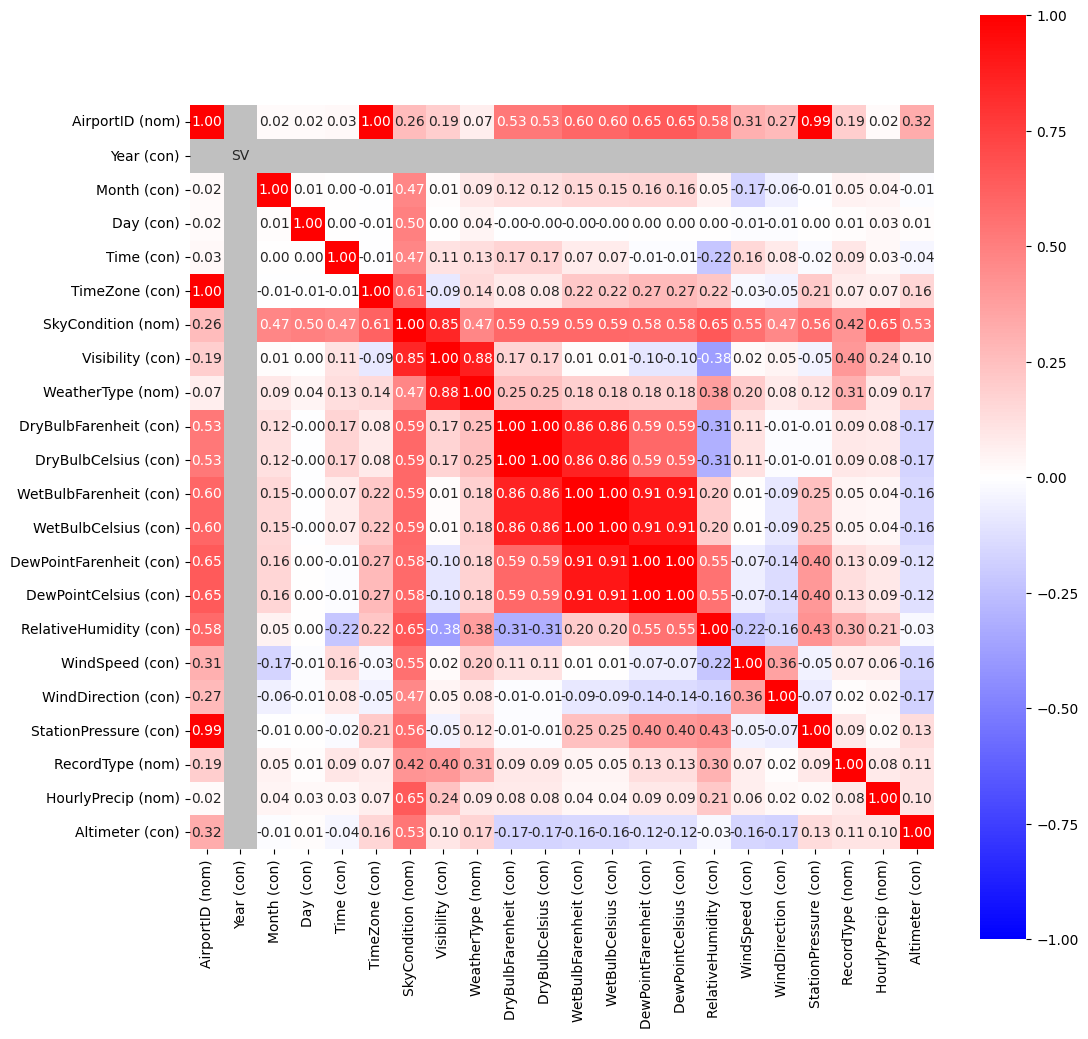

{'corr':                          AirportID (nom)  Year (con)  Month (con)  Day (con)  \
 AirportID (nom)                 1.000000         0.0     0.021828   0.019249   
 Year (con)                      0.000000         0.0     0.000000   0.000000   
 Month (con)                     0.021828         0.0     1.000000   0.009209   
 Day (con)                       0.019249         0.0     0.009209   1.000000   
 Time (con)                      0.028524         0.0     0.002798   0.001771   
 TimeZone (con)                  1.000000         0.0    -0.007727  -0.006397   
 SkyCondition (nom)              0.259840         0.0     0.473779   0.496332   
 Visibility (con)                0.194978         0.0     0.008565   0.003832   
 WeatherType (nom)               0.070129         0.0     0.093717   0.043066   
 DryBulbFarenheit (con)          0.528925         0.0     0.123562  -0.003159   
 DryBulbCelsius (con)            0.528996         0.0     0.123515  -0.003196   
 WetBulbFarenheit (c

In [26]:
nominal.associations(df_clima,figsize=(12,12),mark_columns=True, cmap = 'bwr')